In [36]:
import tensorflow

In [37]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [38]:
from xgboost import XGBClassifier
import pandas as pd  
import numpy as np  
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("IUBAT_Testing7.csv")
df.head()

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,Female,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
1,Male,18-25,2,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
2,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
3,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
4,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Slightly Cool,Very Good


In [40]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
feature_categories = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains numeric data
    if np.issubdtype(df[column].dtype, np.number):
        feature_categories[column] = 'Numerical'
    else:
        feature_categories[column] = 'Categorical'

# Print feature categories
for feature, category in feature_categories.items():
    print(f"Feature: {feature}, Category: {category}")

Feature: Gender, Category: Categorical
Feature: Age, Category: Categorical
Feature: Study_Level, Category: Numerical
Feature: Floor_Level, Category: Numerical
Feature: Room_Orientation, Category: Categorical
Feature: No_Lights, Category: Numerical
Feature: No_Fans, Category: Numerical
Feature: No_Windows, Category: Numerical
Feature: No_Doors, Category: Numerical
Feature: Floor_Area, Category: Numerical
Feature: Distan_Windows, Category: Numerical
Feature: Temperature_(°C) , Category: Numerical
Feature: Humidity_(%), Category: Numerical
Feature: CO2_(PPM), Category: Numerical
Feature: PMV_Level, Category: Categorical
Feature: Lighting_Level, Category: Categorical


In [41]:
df.PMV_Level


0             Neutral
1             Neutral
2                Warm
3                Warm
4       Slightly Cool
            ...      
1082              Hot
1083              Hot
1084          Neutral
1085              Hot
1086          Neutral
Name: PMV_Level, Length: 1087, dtype: object

In [42]:
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

In [43]:
df.head() 

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,2,1


In [44]:
inputs = df.drop(['PMV_Level',], axis='columns')

In [45]:
target = df['PMV_Level']

In [46]:
inputs

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,0,0,3,504,0,21,12,5,2,320,3,30,63,447,0
1083,0,0,3,504,0,21,12,5,2,320,3,30,63,447,2
1084,1,0,3,504,0,21,12,5,2,320,2,30,63,447,3
1085,1,0,3,504,0,21,12,5,2,320,2,30,63,447,5


In [47]:
target

0       0
1       0
2       1
3       1
4       2
       ..
1082    3
1083    3
1084    0
1085    3
1086    0
Name: PMV_Level, Length: 1087, dtype: uint8

In [48]:
import pandas as pd

# Assuming your input feature data is stored in 'df'
data_shape = df.shape
print(data_shape)

(1087, 16)


In [49]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [50]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
feature_categories = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains numeric data
    if np.issubdtype(df[column].dtype, np.number):
        feature_categories[column] = 'Numerical'
    else:
        feature_categories[column] = 'Categorical'

# Print feature categories
for feature, category in feature_categories.items():
    print(f"Feature: {feature}, Category: {category}")

Feature: Gender, Category: Numerical
Feature: Age, Category: Numerical
Feature: Study_Level, Category: Numerical
Feature: Floor_Level, Category: Numerical
Feature: Room_Orientation, Category: Numerical
Feature: No_Lights, Category: Numerical
Feature: No_Fans, Category: Numerical
Feature: No_Windows, Category: Numerical
Feature: No_Doors, Category: Numerical
Feature: Floor_Area, Category: Numerical
Feature: Distan_Windows, Category: Numerical
Feature: Temperature_(°C), Category: Numerical
Feature: Humidity_(%), Category: Numerical
Feature: CO2_(PPM), Category: Numerical
Feature: PMV_Level, Category: Numerical
Feature: Lighting_Level, Category: Numerical


In [51]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [52]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [53]:
# Define SMOTE-Tomek Links
resample=SMOTEENN(random_state =42)
X, y = resample.fit_resample(X, y)

In [54]:
y.value_counts()

PMV_Level
4    236
6    134
2     96
3     81
0     37
5     21
1     12
Name: count, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [57]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
scaler = MinMaxScaler()

In [59]:
# Prevent data leakage by only fitting scaler to train data
scaler.fit(X_train)

MinMaxScaler()

In [60]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Add our early stop detector
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Feature selection using correlations approach

In [62]:
import pandas as pd
import numpy as np

# Assuming you have your input features in a DataFrame `X` and target variable in a Series `y`
# X should have the shape (number of samples, number of features), and y should have the shape (number of samples,)

# Concatenate X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlations between input features and the target variable
feature_correlations = correlation_matrix.iloc[:-1, -1]

# Sort the feature correlations in descending order
sorted_correlations = feature_correlations.abs().sort_values(ascending=False)

# Print the feature correlations
print("Feature Correlations:")
print(sorted_correlations)

# Select the top-k features based on correlation coefficients or p-values
k = 7  # Number of features to select
selected_features = sorted_correlations.index[:k]

# Print the selected features
print("Selected Features:")
print(selected_features)

Feature Correlations:
Study_Level         0.320702
Distan_Windows      0.317833
CO2_(PPM)           0.313394
Age                 0.291092
Floor_Area          0.284117
Gender              0.279288
No_Fans             0.246725
No_Windows          0.244571
No_Lights           0.240671
Room_Orientation    0.239523
Humidity_(%)        0.215589
Floor_Level         0.201652
Temperature_(°C)    0.157107
Lighting_Level      0.154777
No_Doors            0.106088
Name: PMV_Level, dtype: float64
Selected Features:
Index(['Study_Level', 'Distan_Windows', 'CO2_(PPM)', 'Age', 'Floor_Area',
       'Gender', 'No_Fans'],
      dtype='object')


# ANOVA test

In [63]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

# Preprocess the data
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Get the list of all columns except the dependent variable (PMV_Level)
independent_vars = [col for col in df.columns if col != 'PMV_Level']

# Perform ANOVA tests for each independent variable
for var in independent_vars:
    groups = []
    for group_name, group_data in df.groupby('PMV_Level')[var]:
        groups.append(group_data)
    f_statistic, p_value = f_oneway(*groups)
    print(f"ANOVA test for {var}: F-Statistic = {f_statistic}, p-value = {p_value}")
    

ANOVA test for Gender: F-Statistic = 17.71741795433486, p-value = 1.1751005278343104e-19
ANOVA test for Age: F-Statistic = 2.0058462007300886, p-value = 0.06217784977709966
ANOVA test for Study_Level: F-Statistic = 4.518518307946008, p-value = 0.00015609788634870554
ANOVA test for Floor_Level: F-Statistic = 4.5210427520352665, p-value = 0.0001551052193605425
ANOVA test for Room_Orientation: F-Statistic = 4.166981693133149, p-value = 0.0003778034234079018
ANOVA test for No_Lights: F-Statistic = 4.068996443728273, p-value = 0.00048252381543235266
ANOVA test for No_Fans: F-Statistic = 1.9216403732103078, p-value = 0.07436425070772046
ANOVA test for No_Windows: F-Statistic = 10.258529557122404, p-value = 4.561614889800686e-11
ANOVA test for No_Doors: F-Statistic = 1.0749325543386858, p-value = 0.3755063170308359
ANOVA test for Floor_Area: F-Statistic = 3.3163484992690546, p-value = 0.003063485373892856
ANOVA test for Distan_Windows: F-Statistic = 14.45069092942671, p-value = 6.581784118293

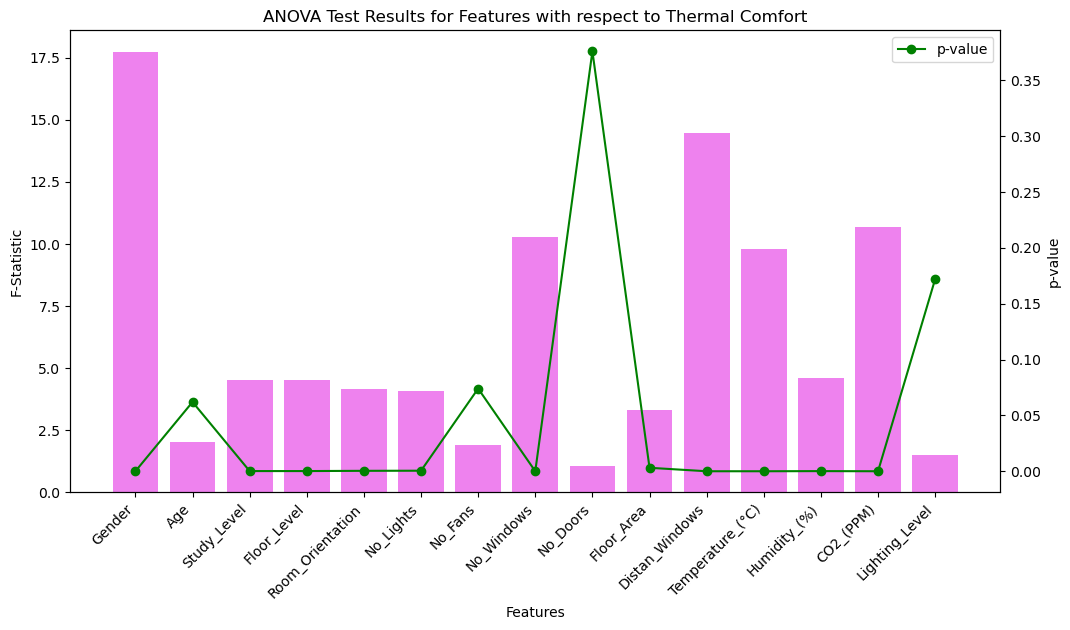

In [71]:
import matplotlib.pyplot as plt
import plotly.express as px

# Data for ANOVA test results
features = ['Gender', 'Age', 'Study_Level', 'Floor_Level', 'Room_Orientation', 'No_Lights', 
            'No_Fans', 'No_Windows', 'No_Doors', 'Floor_Area', 'Distan_Windows', 
            'Temperature_(°C)', 'Humidity_(%)', 'CO2_(PPM)', 'Lighting_Level']
f_statistics = [17.72, 2.01, 4.52, 4.52, 4.17, 4.07, 1.92, 10.26, 1.07, 3.32, 14.45, 9.80, 4.62, 10.69, 1.51]
p_values = [1.18e-19, 0.062, 0.00016, 0.00016, 0.00038, 0.00048, 0.074, 4.56e-11, 0.376, 0.0031, 6.58e-16, 1.53e-10, 0.00012, 1.44e-11, 0.172]

# Create a bar plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(features, f_statistics, color='violet', label='F-Statistic')
plt.xlabel('Features')
plt.ylabel('F-Statistic')
plt.xticks(rotation=45, ha='right')
plt.twinx()
plt.plot(features, p_values, color='green', marker='o', label='p-value')
plt.ylabel('p-value')
plt.title('ANOVA Test Results for Features with respect to Thermal Comfort')
plt.legend(loc='upper right')
plt.show()

# Create an interactive bar plot using Plotly
df = pd.DataFrame({'Features': features, 'F-Statistic': f_statistics, 'p-value': p_values})
fig = px.bar(df, x='Features', y='F-Statistic', color='p-value', title='ANOVA Test Results for Features with respect to Thermal Comfort',
             labels={'F-Statistic': 'F-Statistic', 'p-value': 'p-value'})
fig.show()

# Correlation analysis (bivariate):

In [72]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

# Perform data preprocessing
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Calculate the Pearson correlation coefficients
correlations = df.corr()['PMV_Level'].drop('PMV_Level')  # Calculate correlations with PMV_Level, excluding PMV_Level itself

# Print the correlations
print("Correlation coefficients with PMV_Level:")
print(correlations)

Correlation coefficients with PMV_Level:
Gender              0.013016
Age                 0.064918
Study_Level        -0.021478
Floor_Level         0.050596
Room_Orientation    0.009514
No_Lights           0.059446
No_Fans            -0.074057
No_Windows          0.059965
No_Doors            0.039247
Floor_Area          0.090540
Distan_Windows      0.015588
Temperature_(°C)    0.050968
Humidity_(%)       -0.064059
CO2_(PPM)           0.084986
Lighting_Level      0.029094
Name: PMV_Level, dtype: float64


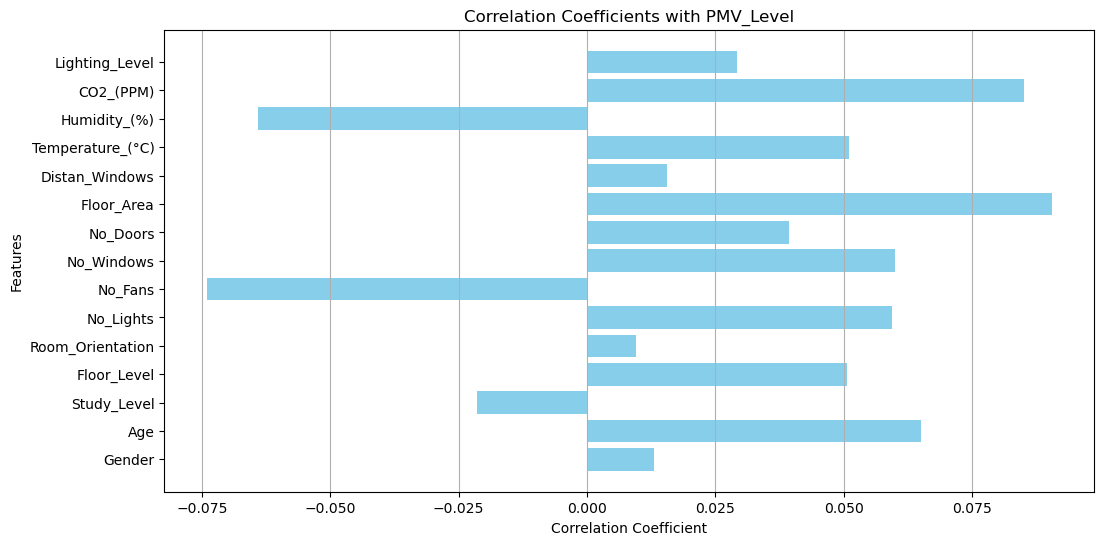

In [73]:
import matplotlib.pyplot as plt

# Correlation coefficients
correlations = {
    'Gender': 0.013016,
    'Age': 0.064918,
    'Study_Level': -0.021478,
    'Floor_Level': 0.050596,
    'Room_Orientation': 0.009514,
    'No_Lights': 0.059446,
    'No_Fans': -0.074057,
    'No_Windows': 0.059965,
    'No_Doors': 0.039247,
    'Floor_Area': 0.090540,
    'Distan_Windows': 0.015588,
    'Temperature_(°C)': 0.050968,
    'Humidity_(%)': -0.064059,
    'CO2_(PPM)': 0.084986,
    'Lighting_Level': 0.029094
}

# Creating a bar graph
plt.figure(figsize=(12, 6))
plt.barh(list(correlations.keys()), list(correlations.values()), color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation Coefficients with PMV_Level')
plt.grid(axis='x')
plt.show()

# LinearRegression Model

In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the preprocessed dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)


# Separate the dataset into features (X) and the target variable (y)
X = df.drop('PMV_Level', axis=1)  # Features
y = df['PMV_Level']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Get the coefficients of the model
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Mean Squared Error: 3.5183649577618725
Coefficients: [-3.89285247e-02  5.08170393e-01 -2.33638011e-01  2.62888267e-04
 -5.43047289e-02 -8.93780242e-04 -3.85997011e-02  4.12853590e-02
  4.31336442e-02  1.02347361e-02 -2.29200241e-02 -6.02270826e-02
 -2.54902054e-02  4.17181938e-02 -6.21572459e-03]
Intercept: -15.265672435535924


In [74]:
import plotly.graph_objects as go
import pandas as pd

# Coefficients and Intercept
coefficients = [-0.0389285247, 0.508170393, -0.233638011, 0.000262888267, -0.0543047289,
                -0.000893780242, -0.0385997011, 0.041285359, 0.0431336442, 0.0102347361,
                -0.0229200241, -0.0602270826, -0.0254902054, 0.0417181938, -0.00621572459]
intercept = -15.265672435535924

# Features
features = ['Gender', 'Age', 'Study_Level', 'Floor_Level', 'Room_Orientation', 'No_Lights',
            'No_Fans', 'No_Windows', 'No_Doors', 'Floor_Area', 'Distan_Windows',
            'Temperature_(°C)', 'Humidity_(%)', 'CO2_(PPM)', 'Lighting_Level']

# Create a DataFrame for displaying the coefficients
df_coef = pd.DataFrame({'Features': features, 'Coefficients': coefficients})
df_coef.loc[len(df_coef)] = ['Intercept', intercept]

# Create an interactive table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=['Features', 'Coefficients'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_coef.Features, df_coef.Coefficients],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [75]:
import plotly.graph_objects as go

# Create a horizontal bar chart for coefficients
fig = go.Figure()
fig.add_trace(go.Bar(y=features + ['Intercept'], x=coefficients + [intercept],
                     text=[f'{coef:.2f}' for coef in coefficients] + [f'{intercept:.2f}'],
                     textposition='outside',
                     orientation='h'))

fig.update_layout(title='Coefficients of Linear Regression Model',
                  xaxis_title='Coefficient Value',
                  yaxis_title='Features',
                  width=800,
                  height=600)

fig.show()

In [76]:
import plotly.graph_objects as go
import numpy as np

# Create a matrix for the coefficients and intercept
coeff_matrix = np.array(coefficients + [intercept]).reshape(1, -1)

# Create a heatmap for coefficients
fig = go.Figure(data=go.Heatmap(z=coeff_matrix, x=features + ['Intercept'],
                                 colorscale='Viridis'))

fig.update_layout(title='Coefficients of Linear Regression Model',
                  xaxis_title='Features',
                  yaxis_title='Coefficient Value',
                  width=800,
                  height=600)

fig.show()